## Lead score Logistic regression
With 37 predictor variables build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.

### Step 1: Importing and Merging Data

In [1]:
# Suppressing Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing Pandas and NumPy
import pandas as pd, numpy as np

In [7]:
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

In [100]:
# Importing all datasets
lead_data = pd.read_csv("Leads.csv")
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


### Step 2: Inspecting the Dataframe

In [101]:
# Let's see the head of our master dataset
lead_data.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


##Observation: we can observe number of columns have select as some default value, It may be equivalent to NULL Values

In [102]:
# Let's check the dimensions of the dataframe
lead_data.shape

(9240, 37)

In [8]:
# let's look at the statistical aspects of the dataframe
lead_data.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [9]:
# Let's see the type of each column
lead_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [103]:

lead_data=lead_data.replace('Select', np.nan)

In [28]:
lead_data.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   3380
How did you hear about X Education               7250
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [29]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [30]:
lead_desc=round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

In [ ]:
#Eliminate columns with NULL values more than 70%

In [104]:
lead_data = lead_data.drop(lead_data.loc[:,list(round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)>70)].columns, 1)
lead_data.shape

(9240, 35)

## IMPUTING OTHER COLUMNS 
such as CITY, LEAD QUALITY,Specialization, ASYMMETRIQUE columns, TAGS etc
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Tags                                             36.29
Lead Quality                                     51.59
Lead Profile                                     74.19
City                                             39.71
Asymmetrique Activity Index                      45.65
Asymmetrique Profile Index                       45.65
Asymmetrique Activity Score                      45.65
Asymmetrique Profile Score                       45.65

In [105]:
import matplotlib.pyplot as plt
import seaborn as sns

# visulaisation
from matplotlib.pyplot import xticks
%matplotlib inline

In [66]:
lead_data.City.describe()

count       5571
unique         6
top       Mumbai
freq        3222
Name: City, dtype: object

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

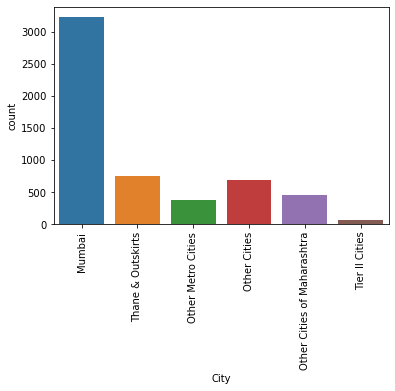

In [67]:
sns.countplot(lead_data.City)
xticks(rotation = 90)

In [106]:
## Filling Null values with Mumbai as this is seen as the most common city
lead_data['City'] = lead_data['City'].replace(np.nan, 'Mumbai')

In [69]:
lead_data.Specialization.describe()

count                   5860
unique                    18
top       Finance Management
freq                     976
Name: Specialization, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Business Administration'),
  Text(1, 0, 'Media and Advertising'),
  Text(2, 0, 'Supply Chain Management'),
  Text(3, 0, 'IT Projects Management'),
  Text(4, 0, 'Finance Management'),
  Text(5, 0, 'Travel and Tourism'),
  Text(6, 0, 'Human Resource Management'),
  Text(7, 0, 'Marketing Management'),
  Text(8, 0, 'Banking, Investment And Insurance'),
  Text(9, 0, 'International Business'),
  Text(10, 0, 'E-COMMERCE'),
  Text(11, 0, 'Operations Management'),
  Text(12, 0, 'Retail Management'),
  Text(13, 0, 'Services Excellence'),
  Text(14, 0, 'Hospitality Management'),
  Text(15, 0, 'Rural and Agribusiness'),
  Text(16, 0, 'Healthcare Management'),
  Text(17, 0, 'E-Business')])

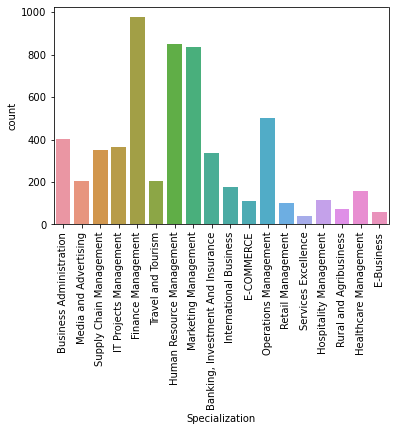

In [70]:
sns.countplot(lead_data.Specialization)
xticks(rotation = 90)

No specific value is relevant for specialization, Let us use category "Others" for missing values.

In [107]:
lead_data['Specialization'] = lead_data['Specialization'].replace(np.nan, 'Others')

#What matters most to you in choosing a course

In [76]:
lead_data['What matters most to you in choosing a course'].describe()

count                        6531
unique                          3
top       Better Career Prospects
freq                         6528
Name: What matters most to you in choosing a course, dtype: object

(array([0, 1, 2]),
 [Text(0, 0, 'Better Career Prospects'),
  Text(1, 0, 'Flexibility & Convenience'),
  Text(2, 0, 'Other')])

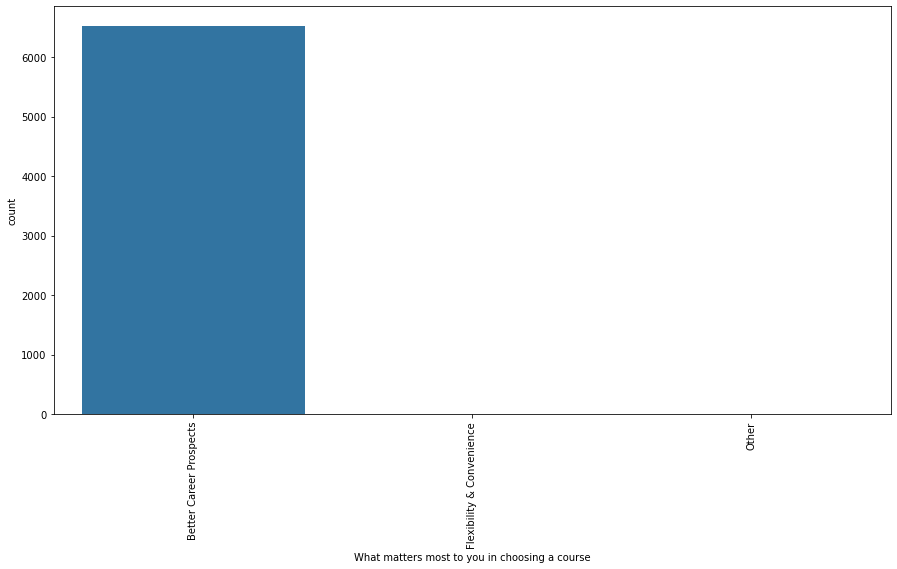

In [81]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(lead_data['What matters most to you in choosing a course'])
xticks(rotation = 90)

In [108]:
#  imputed by 'Better Career Prospects'.
lead_data['What matters most to you in choosing a course'] = lead_data['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

#What is your current occupation

In [75]:
lead_data['What is your current occupation'].describe()

count           6550
unique             6
top       Unemployed
freq            5600
Name: What is your current occupation, dtype: object

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Unemployed'),
  Text(1, 0, 'Student'),
  Text(2, 0, 'Working Professional'),
  Text(3, 0, 'Businessman'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Housewife')])

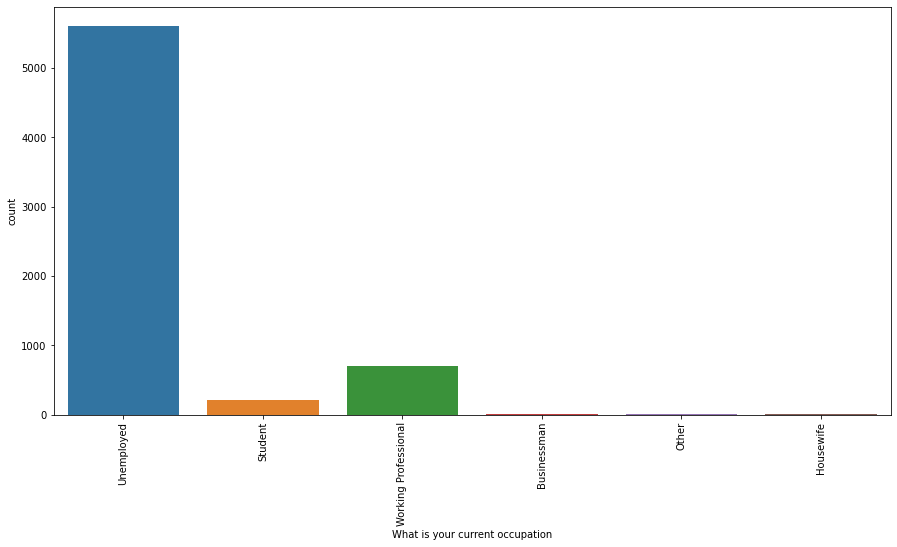

In [82]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(lead_data['What is your current occupation'])
xticks(rotation = 90)

In [109]:
#  Since 6000 out of 9600 are taken by unemployed this can be imputed by 'Umemployed'.
lead_data['What is your current occupation'] = lead_data['What is your current occupation'].replace(np.nan, 'Unemployed')

In [84]:
lead_data.Tags.describe()

count                                    5887
unique                                     26
top       Will revert after reading the email
freq                                     2072
Name: Tags, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

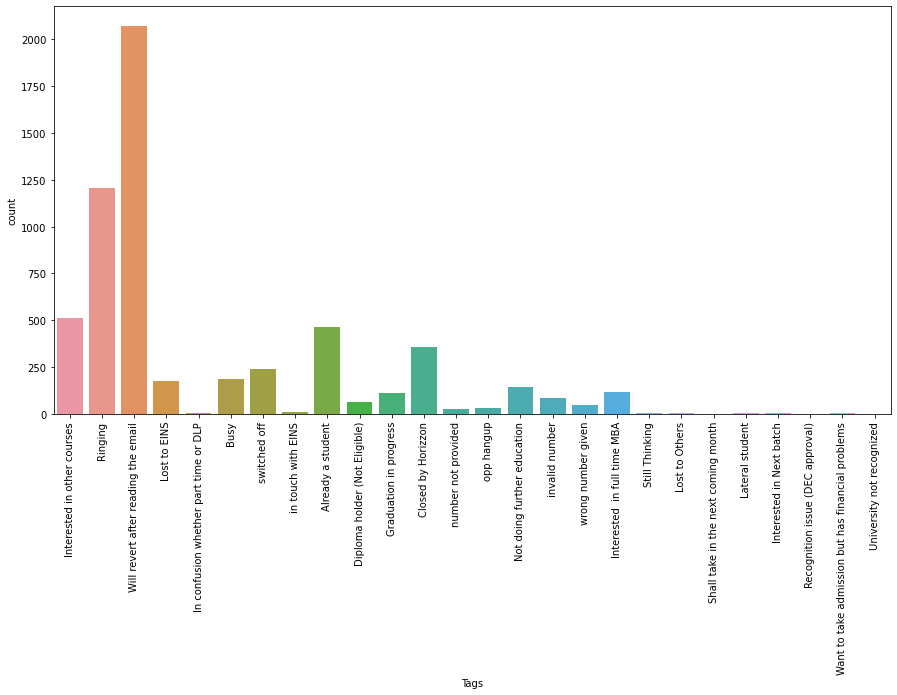

In [87]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(lead_data['Tags'])
xticks(rotation = 90)

In [110]:

lead_data['Tags'] = lead_data['Tags'].replace(np.nan, 'Will revert after reading the email')
# We shall impute tag column may be imputed by 'Will revert after reading the email'.

In [90]:
lead_data.Country.describe()

count      9240
unique       38
top       India
freq       8953
Name: Country, dtype: object

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37]),
 [Text(0, 0, 'India'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Kuwait'),
  Text(3, 0, 'Oman'),
  Text(4, 0, 'United Arab Emirates'),
  Text(5, 0, 'United States'),
  Text(6, 0, 'Australia'),
  Text(7, 0, 'United Kingdom'),
  Text(8, 0, 'Bahrain'),
  Text(9, 0, 'Ghana'),
  Text(10, 0, 'Singapore'),
  Text(11, 0, 'Qatar'),
  Text(12, 0, 'Saudi Arabia'),
  Text(13, 0, 'Belgium'),
  Text(14, 0, 'France'),
  Text(15, 0, 'Sri Lanka'),
  Text(16, 0, 'China'),
  Text(17, 0, 'Canada'),
  Text(18, 0, 'Netherlands'),
  Text(19, 0, 'Sweden'),
  Text(20, 0, 'Nigeria'),
  Text(21, 0, 'Hong Kong'),
  Text(22, 0, 'Germany'),
  Text(23, 0, 'Asia/Pacific Region'),
  Text(24, 0, 'Uganda'),
  Text(25, 0, 'Kenya'),
  Text(26, 0, 'Italy'),
  Text(27, 0, 'South Africa'),
  Text(28, 0, 'Tanzania'),
  Text(29, 0, 'unknown'),
  Text(30, 0

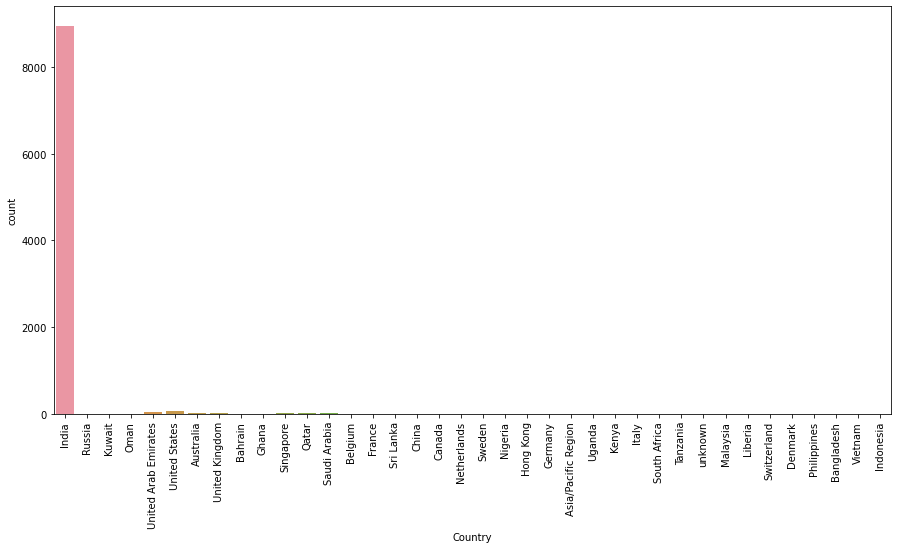

In [91]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(lead_data['Country'])
xticks(rotation = 90)

In [111]:
# Country is India for most values so let's impute the same in missing values.
lead_data['Country'] = lead_data['Country'].replace(np.nan, 'India')

In [58]:
lead_data['Lead Quality'].describe()

count         4473
unique           5
top       Might be
freq          1560
Name: Lead Quality, dtype: object

In [ ]:
data.Specialization.describe()
sns.countplot(data.Specialization)
xticks(rotation = 90)

<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

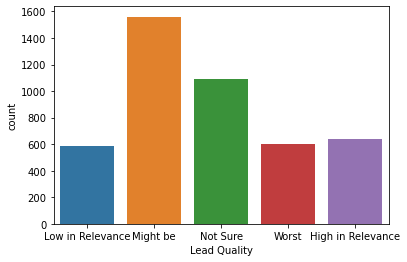

In [62]:
sns.countplot(lead_data['Lead Quality'])
#Indicates the quality of lead based on the data and intuition the the employee who has been assigned to the lead.

In [ ]:
#Here NOT SURE is as good as NULL values,  

In [112]:
lead_data['Lead Quality'] = lead_data['Lead Quality'].replace(np.nan, 'Not Sure')


<AxesSubplot:xlabel='Lead Quality', ylabel='count'>

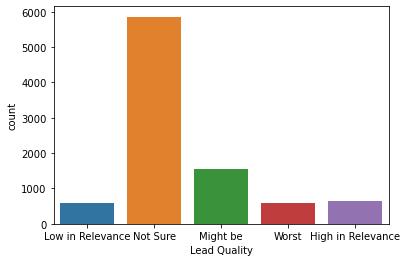

In [64]:
sns.countplot(lead_data['Lead Quality'])

In [ ]:
#with nearly 6000 values out of 9600 having Not Sure, we can drop this column


In [113]:
round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                           0.00
Specialization                                    0.00
What is your current occupation                   0.00
What matters most to you in choosing a course     0.00
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [95]:
lead_data['Asymmetrique Activity Index'].describe()

count          5022
unique            3
top       02.Medium
freq           3839
Name: Asymmetrique Activity Index, dtype: object

<AxesSubplot:xlabel='Asymmetrique Activity Index', ylabel='count'>

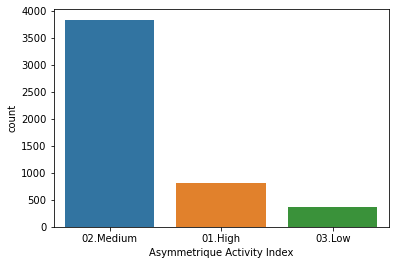

In [96]:
sns.countplot(lead_data['Asymmetrique Profile Index'])

<AxesSubplot:xlabel='Asymmetrique Activity Score', ylabel='count'>

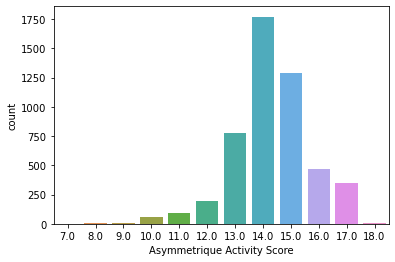

In [97]:
sns.countplot(lead_data['Asymmetrique Activity Score'])

<AxesSubplot:xlabel='Asymmetrique Profile Score', ylabel='count'>

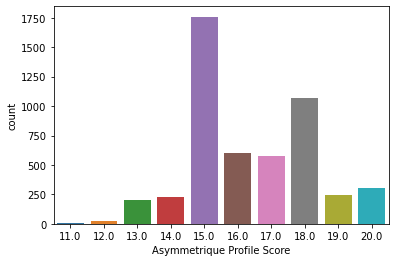

In [98]:
sns.countplot(lead_data['Asymmetrique Profile Score'])

We still have above 4 Asymmetrique columns with a high NULL value percentage above 45%. As these are An index and score assigned to each customer based on their activity and their profile and can not be imputed with median or categorical values, We shall drop them.

In [114]:
lead_data.shape

(9240, 35)

In [117]:
lead_data=lead_data.drop(lead_data.loc[:,list(round(100*(lead_data.isnull().sum()/len(lead_data.index)), 2)>40)].columns, 1)
lead_data.shape

(9240, 31)

In [177]:
# Rest missing values are under 2% so we can drop these rows.
lead_data.dropna(inplace = True)

## EDA 

In [118]:
# Converted is the target variable, Indicates whether a lead has been successfully converted (1) or not (0).
Converted = (sum(lead_data['Converted'])/len(lead_data['Converted'].index))*100
Converted

38.53896103896104

We shall analyze CONVERTED against variables such as Lead quality, Lead source, Lead origin, Last activity, Specialization, occupation etc

## Specialization

In [119]:
lead_data.Specialization.describe()


count       9240
unique        19
top       Others
freq        3380
Name: Specialization, dtype: object

In [120]:
lead_data['Specialization'] = lead_data['Specialization'].replace(['Others'], 'Other_Specialization')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]),
 [Text(0, 0, 'Other_Specialization'),
  Text(1, 0, 'Business Administration'),
  Text(2, 0, 'Media and Advertising'),
  Text(3, 0, 'Supply Chain Management'),
  Text(4, 0, 'IT Projects Management'),
  Text(5, 0, 'Finance Management'),
  Text(6, 0, 'Travel and Tourism'),
  Text(7, 0, 'Human Resource Management'),
  Text(8, 0, 'Marketing Management'),
  Text(9, 0, 'Banking, Investment And Insurance'),
  Text(10, 0, 'International Business'),
  Text(11, 0, 'E-COMMERCE'),
  Text(12, 0, 'Operations Management'),
  Text(13, 0, 'Retail Management'),
  Text(14, 0, 'Services Excellence'),
  Text(15, 0, 'Hospitality Management'),
  Text(16, 0, 'Rural and Agribusiness'),
  Text(17, 0, 'Healthcare Management'),
  Text(18, 0, 'E-Business')])

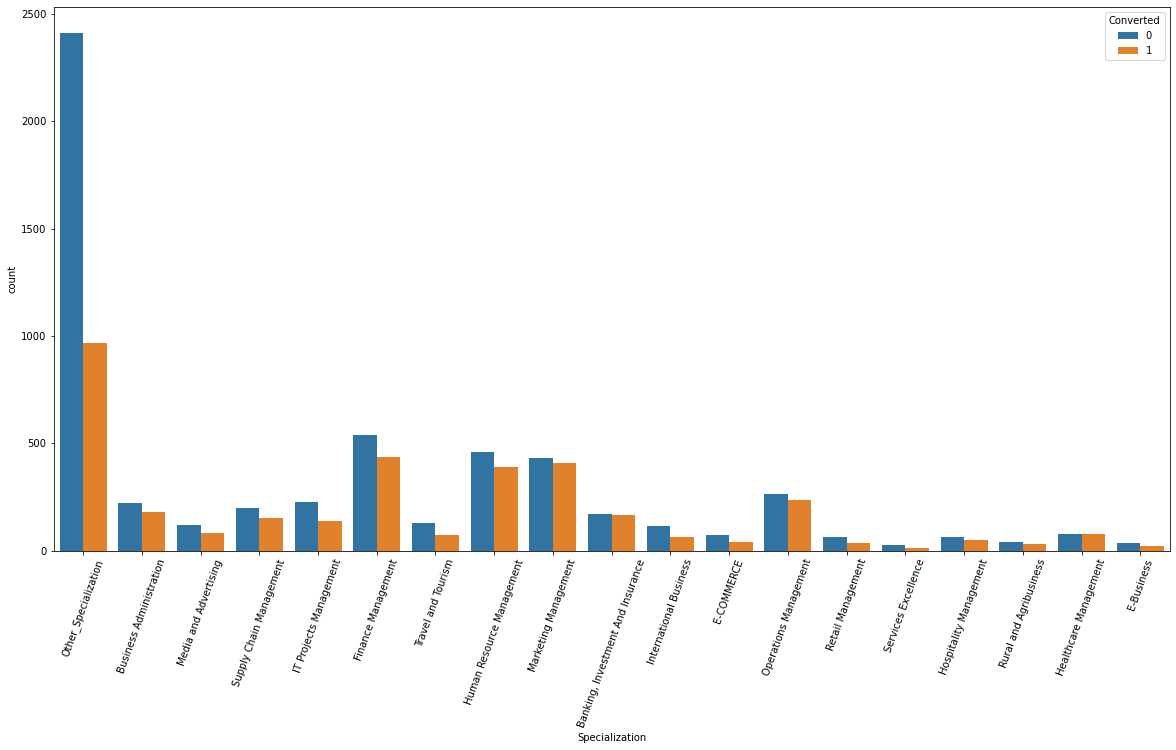

In [122]:
fig, axs = plt.subplots(figsize = (20,10))
sns.countplot(x = "Specialization", hue = "Converted", data = lead_data)
xticks(rotation = 70)


## Last Activity


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Had a Phone Conversation'),
  Text(10, 0, 'View in browser link Clicked'),
  Text(11, 0, 'Approached upfront'),
  Text(12, 0, 'SMS Sent'),
  Text(13, 0, 'Visited Booth in Tradeshow'),
  Text(14, 0, 'Resubscribed to emails'),
  Text(15, 0, 'Email Received'),
  Text(16, 0, 'Email Marked Spam')])

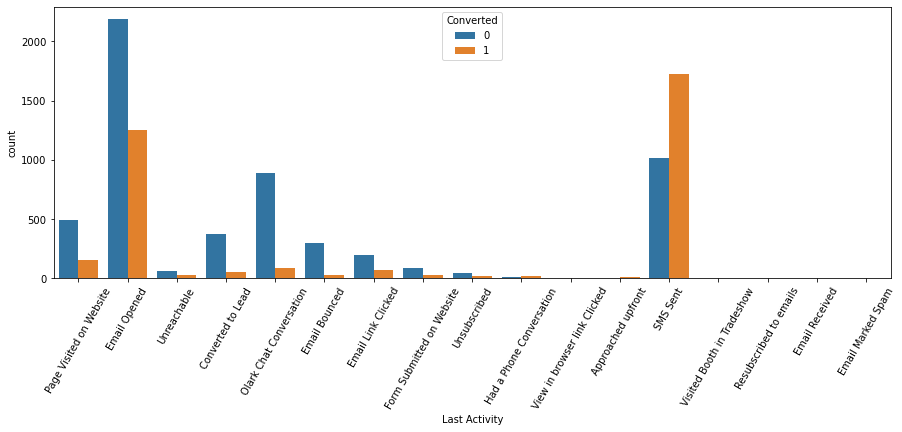

In [123]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
xticks(rotation = 60)

In [124]:
# Too many activity types with no conversion or data. We can bring these under Other category
lead_data['Last Activity'] = lead_data['Last Activity'].replace(['Had a Phone Conversation', 'View in browser link Clicked', 
                                                       'Visited Booth in Tradeshow', 'Approached upfront',
                                                       'Resubscribed to emails','Email Received', 'Email Marked Spam'], 'Other activities')


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'Page Visited on Website'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Unreachable'),
  Text(3, 0, 'Converted to Lead'),
  Text(4, 0, 'Olark Chat Conversation'),
  Text(5, 0, 'Email Bounced'),
  Text(6, 0, 'Email Link Clicked'),
  Text(7, 0, 'Form Submitted on Website'),
  Text(8, 0, 'Unsubscribed'),
  Text(9, 0, 'Other activities'),
  Text(10, 0, 'SMS Sent')])

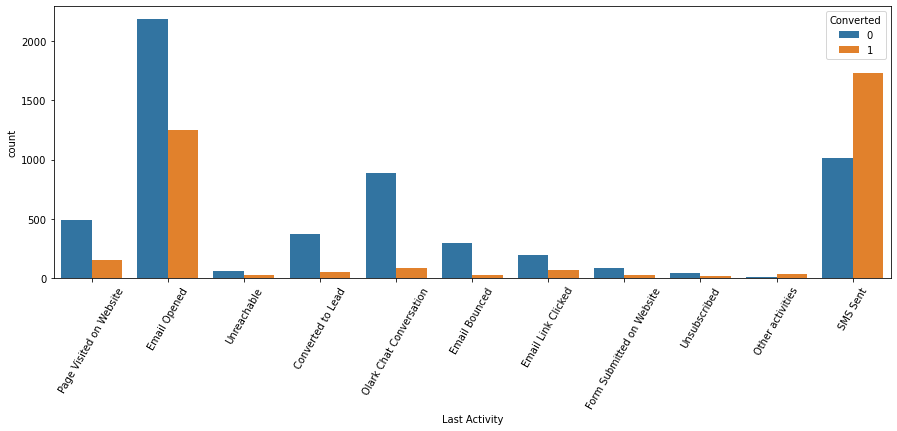

In [125]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Last Activity", hue = "Converted", data = lead_data)
xticks(rotation = 60)

## Occupation

<AxesSubplot:xlabel='What is your current occupation', ylabel='count'>

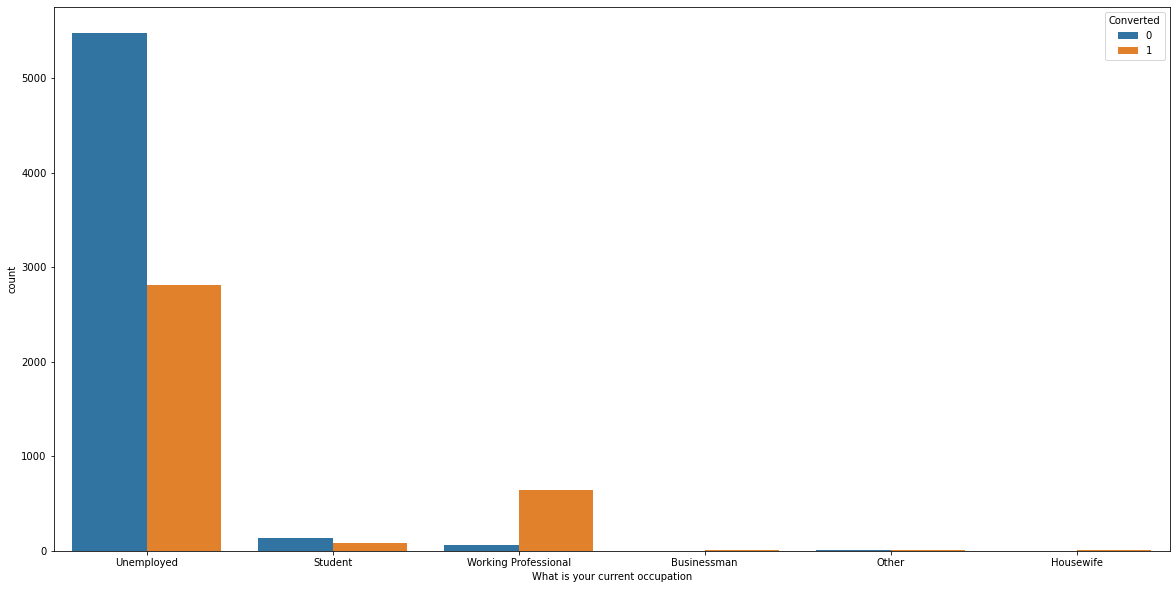

In [126]:
fig, axs = plt.subplots(figsize = (20,10))
sns.countplot(x = "What is your current occupation", hue = "Converted", data = lead_data)


## Tags

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'In confusion whether part time or DLP'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'in touch with EINS'),
  Text(8, 0, 'Already a student'),
  Text(9, 0, 'Diploma holder (Not Eligible)'),
  Text(10, 0, 'Graduation in progress'),
  Text(11, 0, 'Closed by Horizzon'),
  Text(12, 0, 'number not provided'),
  Text(13, 0, 'opp hangup'),
  Text(14, 0, 'Not doing further education'),
  Text(15, 0, 'invalid number'),
  Text(16, 0, 'wrong number given'),
  Text(17, 0, 'Interested  in full time MBA'),
  Text(18, 0, 'Still Thinking'),
  Text(19, 0, 'Lost to Others'),
  Text(20, 0, 'Shall take in the next coming month'),
  Text(21, 0, 'Lateral student'),
  Text(22, 0, 'Interested in Next batc

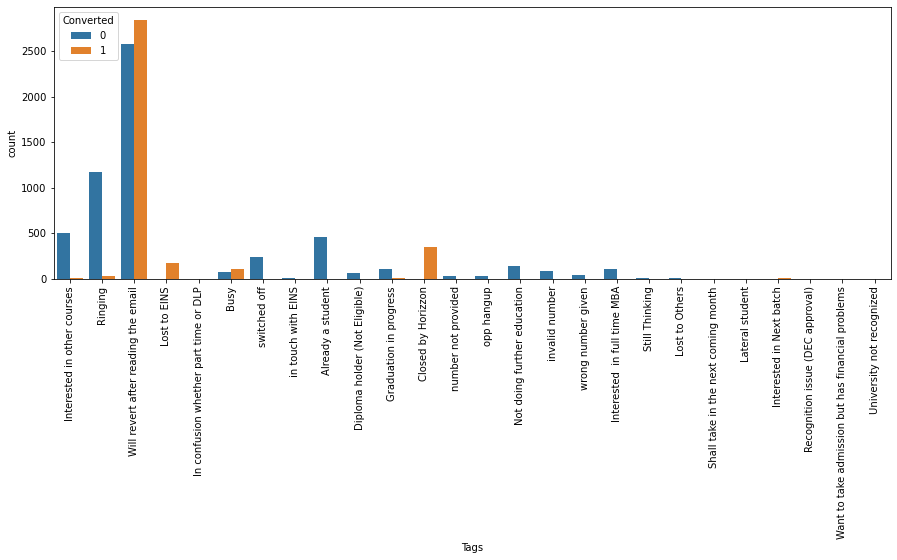

In [128]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data)
xticks(rotation = 90)



In [129]:
lead_data['Tags'] = lead_data['Tags'].replace(['In confusion whether part time or DLP', 'in touch with EINS','Diploma holder (Not Eligible)',
                                     'Approached upfront','Graduation in progress','number not provided', 'opp hangup','Still Thinking',
                                    'Lost to Others','Shall take in the next coming month','Lateral student','Interested in Next batch',
                                    'Recognition issue (DEC approval)','Want to take admission but has financial problems',
                                    'University not recognized'], 'Others')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(0, 0, 'Interested in other courses'),
  Text(1, 0, 'Ringing'),
  Text(2, 0, 'Will revert after reading the email'),
  Text(3, 0, 'Lost to EINS'),
  Text(4, 0, 'Others'),
  Text(5, 0, 'Busy'),
  Text(6, 0, 'switched off'),
  Text(7, 0, 'Already a student'),
  Text(8, 0, 'Closed by Horizzon'),
  Text(9, 0, 'Not doing further education'),
  Text(10, 0, 'invalid number'),
  Text(11, 0, 'wrong number given'),
  Text(12, 0, 'Interested  in full time MBA')])

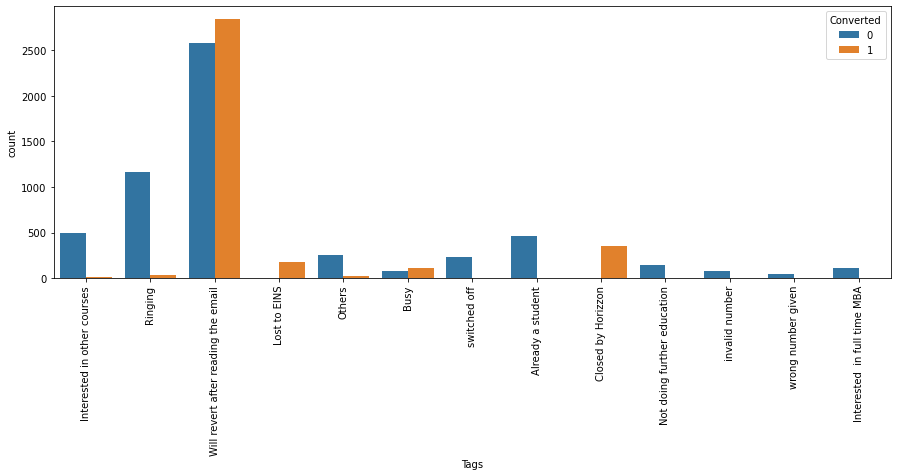

In [130]:
fig, axs = plt.subplots(figsize = (15,5))
sns.countplot(x = "Tags", hue = "Converted", data = lead_data)
xticks(rotation = 90)

INFERENCE:
 LEADS that revert back to after reading the email have more chances of conversion.
 

## CITY

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Mumbai'),
  Text(1, 0, 'Thane & Outskirts'),
  Text(2, 0, 'Other Metro Cities'),
  Text(3, 0, 'Other Cities'),
  Text(4, 0, 'Other Cities of Maharashtra'),
  Text(5, 0, 'Tier II Cities')])

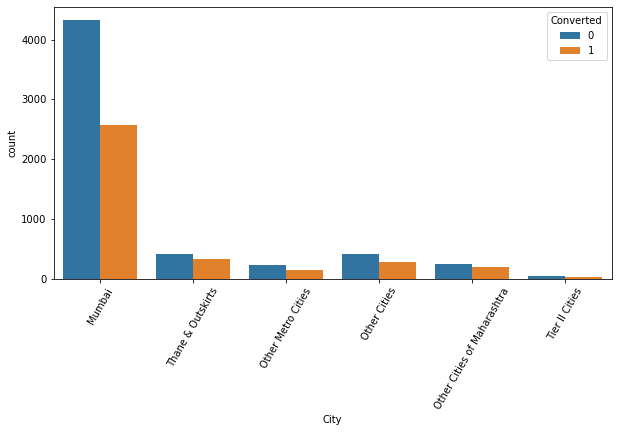

In [132]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "City", hue = "Converted", data = lead_data)
xticks(rotation = 60)

## Lead Source

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'google'),
  Text(8, 0, 'Facebook'),
  Text(9, 0, 'blog'),
  Text(10, 0, 'Pay per Click Ads'),
  Text(11, 0, 'bing'),
  Text(12, 0, 'Social Media'),
  Text(13, 0, 'WeLearn'),
  Text(14, 0, 'Click2call'),
  Text(15, 0, 'Live Chat'),
  Text(16, 0, 'welearnblog_Home'),
  Text(17, 0, 'youtubechannel'),
  Text(18, 0, 'testone'),
  Text(19, 0, 'Press_Release'),
  Text(20, 0, 'NC_EDM')])

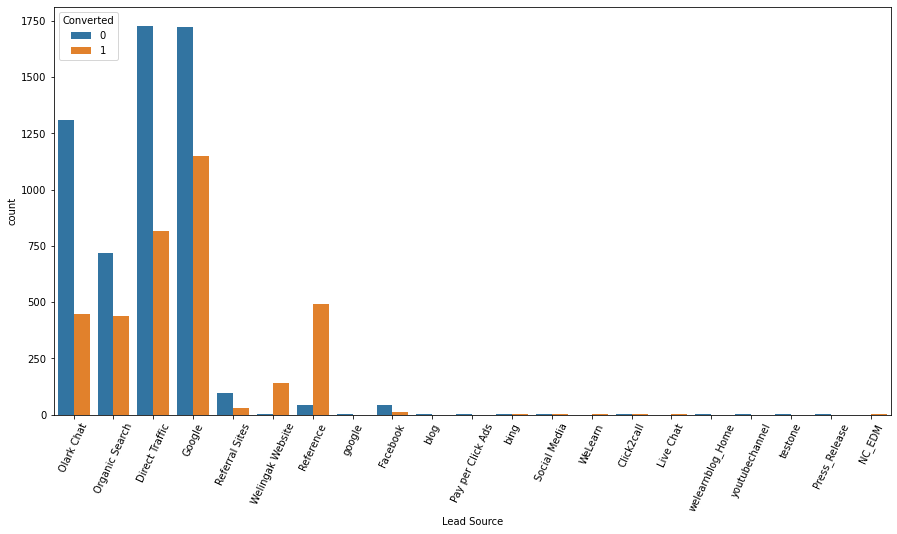

In [133]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
xticks(rotation = 65)

In [135]:
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['google'], 'Google')
lead_data['Lead Source'] = lead_data['Lead Source'].replace(['Click2call', 'Live Chat', 'NC_EDM', 'Pay per Click Ads', 'Press_Release',
  'Social Media', 'WeLearn', 'bing', 'blog', 'testone', 'welearnblog_Home', 'youtubechannel'], 'Others')


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Olark Chat'),
  Text(1, 0, 'Organic Search'),
  Text(2, 0, 'Direct Traffic'),
  Text(3, 0, 'Google'),
  Text(4, 0, 'Referral Sites'),
  Text(5, 0, 'Welingak Website'),
  Text(6, 0, 'Reference'),
  Text(7, 0, 'Facebook'),
  Text(8, 0, 'Others')])

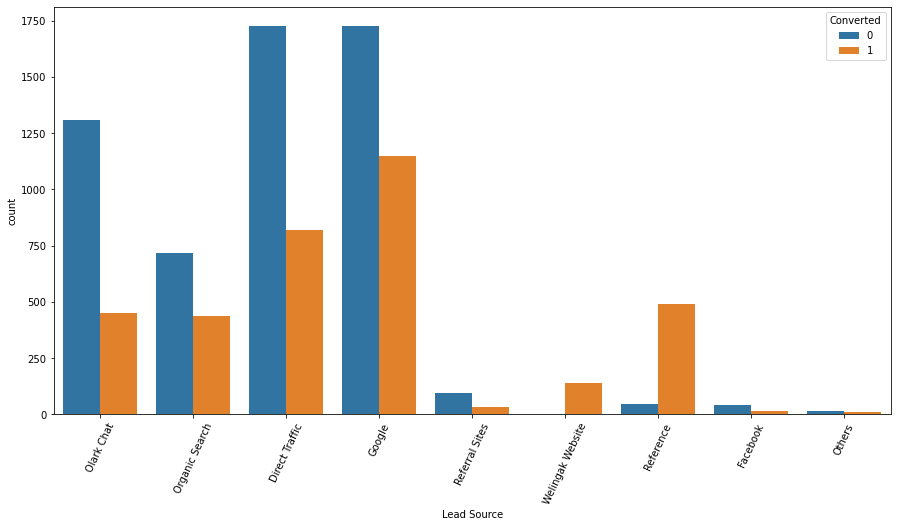

In [136]:
fig, axs = plt.subplots(figsize = (15,7.5))
sns.countplot(x = "Lead Source", hue = "Converted", data = lead_data)
xticks(rotation = 65)

## Lead origin

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'API'),
  Text(1, 0, 'Landing Page Submission'),
  Text(2, 0, 'Lead Add Form'),
  Text(3, 0, 'Lead Import'),
  Text(4, 0, 'Quick Add Form')])

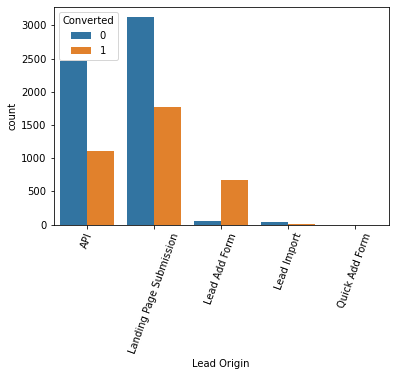

In [138]:
sns.countplot(x = "Lead Origin", hue = "Converted", data = lead_data)
xticks(rotation = 70)

## LEAD QUALITY

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Low in Relevance'),
  Text(1, 0, 'Not Sure'),
  Text(2, 0, 'Might be'),
  Text(3, 0, 'Worst'),
  Text(4, 0, 'High in Relevance')])

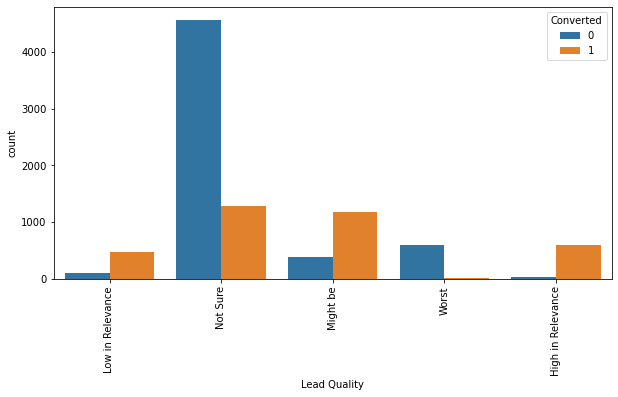

In [139]:
fig, axs = plt.subplots(figsize = (10,5))
sns.countplot(x = "Lead Quality", hue = "Converted", data = lead_data)
xticks(rotation = 90)

## Last Notable Activity

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 [Text(0, 0, 'Modified'),
  Text(1, 0, 'Email Opened'),
  Text(2, 0, 'Page Visited on Website'),
  Text(3, 0, 'Email Bounced'),
  Text(4, 0, 'Email Link Clicked'),
  Text(5, 0, 'Unreachable'),
  Text(6, 0, 'Unsubscribed'),
  Text(7, 0, 'Had a Phone Conversation'),
  Text(8, 0, 'Olark Chat Conversation'),
  Text(9, 0, 'SMS Sent'),
  Text(10, 0, 'Approached upfront'),
  Text(11, 0, 'Resubscribed to emails'),
  Text(12, 0, 'View in browser link Clicked'),
  Text(13, 0, 'Form Submitted on Website'),
  Text(14, 0, 'Email Received'),
  Text(15, 0, 'Email Marked Spam')])

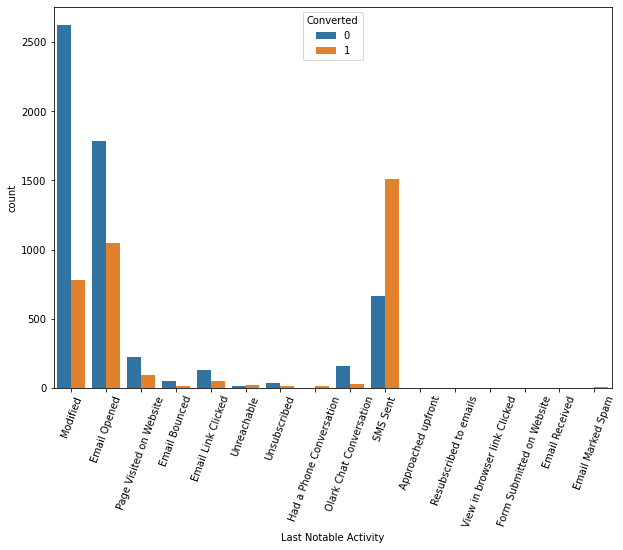

In [140]:
fig, axs = plt.subplots(figsize = (10,7))
sns.countplot(x = "Last Notable Activity", hue = "Converted", data = lead_data)
xticks(rotation = 70)


# DO NOT EMAIL & DO NOT CALL 

<AxesSubplot:xlabel='Do Not Call', ylabel='count'>

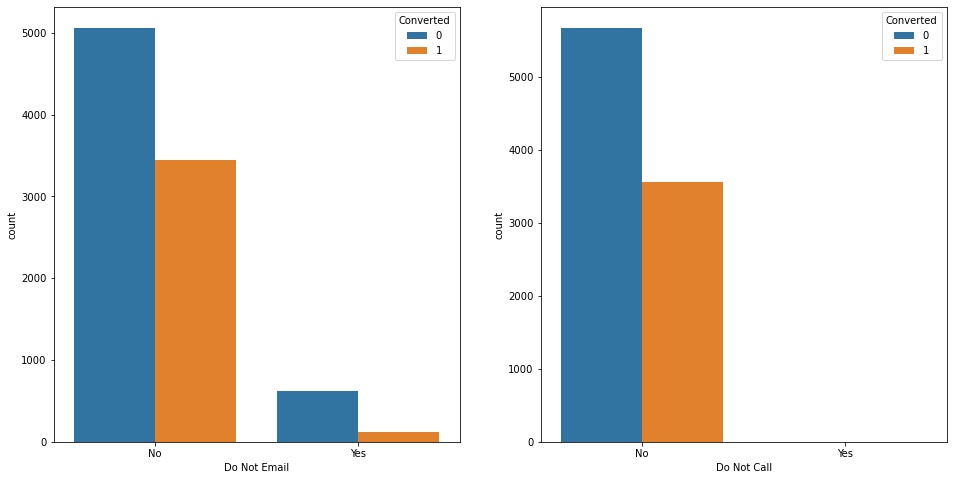

In [141]:
fig, axs = plt.subplots(1,2,figsize = (16,8))
sns.countplot(x = "Do Not Email", hue = "Converted", data = lead_data, ax = axs[0])
sns.countplot(x = "Do Not Call", hue = "Converted", data = lead_data, ax = axs[1])

## Total time spent on website

<AxesSubplot:xlabel='Converted', ylabel='Total Time Spent on Website'>

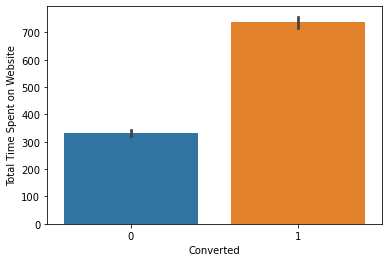

In [143]:
sns.barplot(y = 'Total Time Spent on Website', x = 'Converted', data = lead_data)

## OTHER FIELDS 

# What matters most to you in choosing a course

In [150]:
lead_data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 31 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9074 non-null   object 
 1   Lead Number                                    9074 non-null   int64  
 2   Lead Origin                                    9074 non-null   object 
 3   Lead Source                                    9074 non-null   object 
 4   Do Not Email                                   9074 non-null   object 
 5   Do Not Call                                    9074 non-null   object 
 6   Converted                                      9074 non-null   int64  
 7   TotalVisits                                    9074 non-null   float64
 8   Total Time Spent on Website                    9074 non-null   int64  
 9   Page Views Per Visit                           9074 

In [155]:
lead_data['What matters most to you in choosing a course'].describe()

count                        9074
unique                          3
top       Better Career Prospects
freq                         9072
Name: What matters most to you in choosing a course, dtype: object

In [157]:
lead_data.Search.describe()

count     9074
unique       2
top         No
freq      9060
Name: Search, dtype: object

In [158]:
lead_data.Magazine.describe()

count     9074
unique       1
top         No
freq      9074
Name: Magazine, dtype: object

In [159]:
lead_data['Newspaper Article'].describe()

count     9074
unique       2
top         No
freq      9072
Name: Newspaper Article, dtype: object

In [160]:
lead_data['X Education Forums'].describe()


count     9074
unique       2
top         No
freq      9073
Name: X Education Forums, dtype: object

In [161]:
lead_data['Newspaper'].describe()

count     9074
unique       2
top         No
freq      9073
Name: Newspaper, dtype: object

In [162]:
lead_data['Digital Advertisement'].describe()

count     9074
unique       2
top         No
freq      9070
Name: Digital Advertisement, dtype: object

In [163]:
lead_data['Through Recommendations'].describe()

count     9074
unique       2
top         No
freq      9067
Name: Through Recommendations, dtype: object

In [164]:
lead_data['Receive More Updates About Our Courses'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Receive More Updates About Our Courses, dtype: object

In [165]:
lead_data['A free copy of Mastering The Interview'].describe()

count     9074
unique       2
top         No
freq      6186
Name: A free copy of Mastering The Interview, dtype: object

In [166]:
lead_data['Get updates on DM Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Get updates on DM Content, dtype: object

In [167]:
lead_data['I agree to pay the amount through cheque'].describe()

count     9074
unique       1
top         No
freq      9074
Name: I agree to pay the amount through cheque, dtype: object

In [168]:
lead_data['Update me on Supply Chain Content'].describe()

count     9074
unique       1
top         No
freq      9074
Name: Update me on Supply Chain Content, dtype: object

INFERENCE: ALL the above other fields, have maximum freq value occupied by NO, which doesn't help in any inference. Hence it is fine to drop these columns.
['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country', 'Score','Do Not Call','Do Not Email']

In [170]:
lead_data = lead_data.drop(['Lead Number','What matters most to you in choosing a course','Search','Magazine','Newspaper Article','X Education Forums','Newspaper','Digital Advertisement','Through Recommendations','Receive More Updates About Our Courses','Update me on Supply Chain Content','Get updates on DM Content','I agree to pay the amount through cheque','A free copy of Mastering The Interview','Country','Do Not Call','Do Not Email'],1)

In [172]:
lead_data.shape

(9074, 14)

In [174]:
pd.set_option('display.max_columns', None)

In [176]:
lead_data.head(100)

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.00,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.50,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.00,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.00,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,1,2.0,1428,1.00,Converted to Lead,Other_Specialization,Unemployed,Will revert after reading the email,Might be,Mumbai,Modified
5,2058ef08-2858-443e-a01f-a9237db2f5ce,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Other_Specialization,Unemployed,Will revert after reading the email,Not Sure,Mumbai,Modified
6,9fae7df4-169d-489b-afe4-0f3d752542ed,Landing Page Submission,Google,1,2.0,1640,2.00,Email Opened,Supply Chain Management,Unemployed,Will revert after reading the email,Low in Relevance,Mumbai,Modified
7,20ef72a2-fb3b-45e0-924e-551c5fa59095,API,Olark Chat,0,0.0,0,0.00,Olark Chat Conversation,Other_Specialization,Unemployed,Will revert after reading the email,Not Sure,Mumbai,Modified
8,cfa0128c-a0da-4656-9d47-0aa4e67bf690,Landing Page Submission,Direct Traffic,0,2.0,71,2.00,Email Opened,IT Projects Management,Unemployed,Will revert after reading the email,Not Sure,Thane & Outskirts,Email Opened
9,af465dfc-7204-4130-9e05-33231863c4b5,API,Google,0,4.0,58,4.00,Email Opened,Finance Management,Unemployed,Will revert after reading the email,Not Sure,Mumbai,Email Opened


## Data Preparation
For categorical variables with multiple levels, create dummy features (one-hot encoded)

In [179]:
dummy1 = pd.get_dummies(lead_data[['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation',
                              'Tags','Lead Quality','City','Last Notable Activity']], drop_first=True)
dummy1.head()

,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [180]:
lead_data = pd.concat([lead_data, dummy1], axis=1)
lead_data.head()

,Prospect ID,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,Tags,Lead Quality,City,Last Notable Activity,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,0,0.0,0,0.0,Page Visited on Website,Other_Specialization,Unemployed,Interested in other courses,Low in Relevance,Mumbai,Modified,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,0,5.0,674,2.5,Email Opened,Other_Specialization,Unemployed,Ringing,Not Sure,Mumbai,Email Opened,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Will revert after reading the email,Might be,Mumbai,Email Opened,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,Ringing,Not Sure,Mumbai,Modified,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0

In [181]:
lead_data = lead_data.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Specialization','What is your current occupation','Tags','Lead Quality','City','Last Notable Activity'], axis = 1)

In [182]:
lead_data.head()

,Prospect ID,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,1,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,1,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# Test-Train Split

In [183]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X


In [184]:
X = lead_data.drop(['Prospect ID','Converted'], axis=1)


In [185]:
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [186]:
# Putting response variable to y
y = lead_data['Converted']



In [187]:
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [188]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

## Feature Scaling

In [189]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()



In [190]:
X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.284595,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.284595,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-0.671384,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,-0.284595,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.295588,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [192]:
# Importing matplotlib and seaborn
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

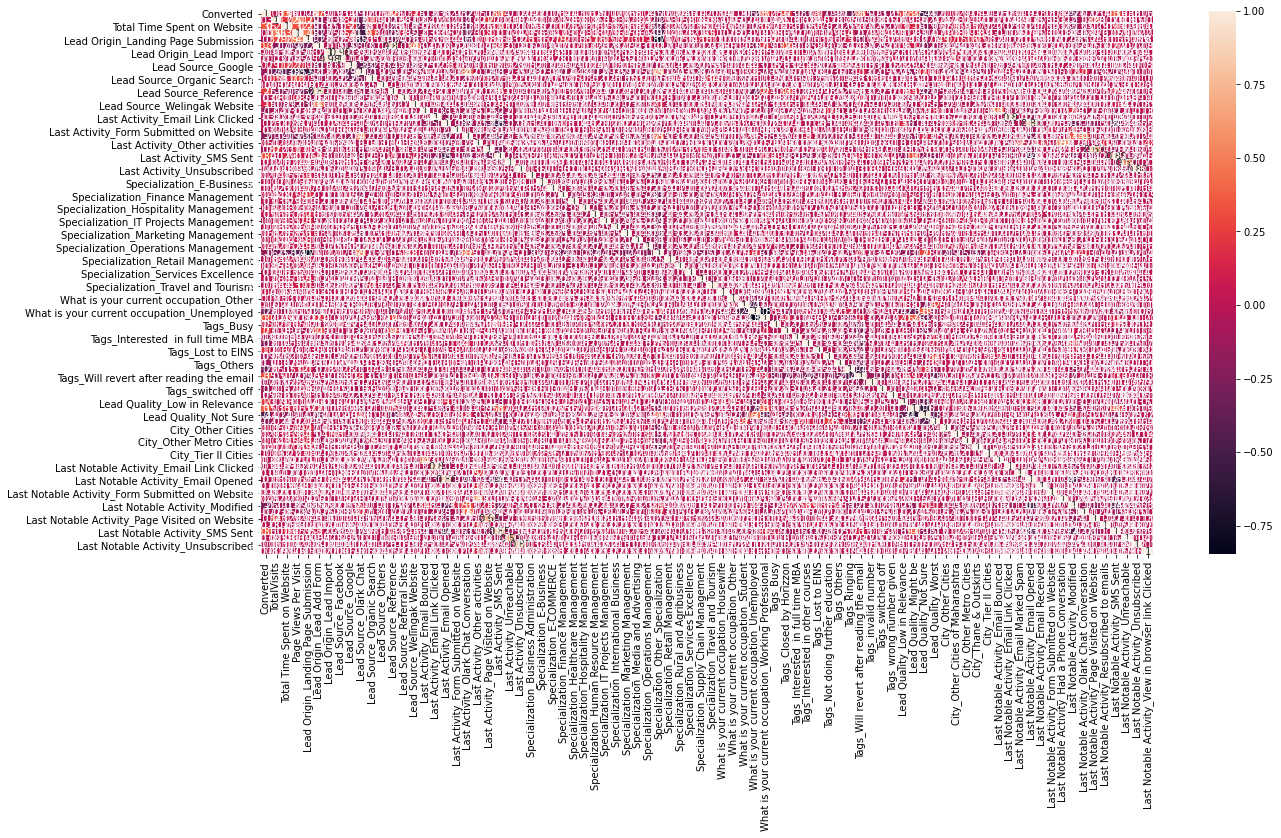

In [194]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))        # Size of the figure
sns.heatmap(lead_data.corr(),annot = True)
plt.show()

## Model Building
Running Your First Training Model

In [195]:
import statsmodels.api as sm

In [196]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6267
Model Family:                Binomial   Df Model:                           83
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1260.0
Date:                Tue, 22 Mar 2022   Deviance:                       2520.1
Time:                        00:39:26   Pearson chi2:                 3.96e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.6079
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   23.1233   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
TotalVisits                                              0.1498      0.037      4.018      0.000       0.077       0.223
Total Time Spent on Website                              1.1474      0.063     18.078      0.000       1.023       1.272
Page Views Per Visit                                    -0.1609      0.073     -2.196      0.028      -0.305      -0.017
Lead Origin_Landing Page Submission                     -1.0575      0.220     -4.810      0.000      -1.488      -0.627
Lead Origin_Lead Add Form                               -0.3070      1.272     -0.241      0.809      -2.801       2.187
Lead Origin_Lead Import                                 29.9227   2.16e+05      0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Facebook                                   -28.6778   2.16e+05     -0.000      1.000   -4.23e+05    4.23e+05
Lead Source_Google                                       0.2304      0.154      1.500      0.134      -0.071       0.532
Lead Source_Olark Chat                                   1.0018      0.225      4.443      0.000       0.560       1.444
Lead Source_Organic Search                               0.2391      0.207      1.156      0.248      -0.166       0.644
Lead Source_Others                                       0.7933      0.792      1.001      0.317      -0.760       2.346
Lead Source_Reference                                    1.7432      1.329      1.312      0.189      -0.861       4.347
Lead Source_Referral Sites                              -0.1082      0.488     -0.222      0.824      -1.064       0.848
Lead Source_Welingak Website                             5.3616      1.470      3.648      0.000       2.481       8.242
Last Activity_Email Bounced                             -1.8167      0.808     -2.248      0.025      -3.401      -0.232
Last Activity_Email Link Clicked                         0.7750      0.648      1.196      0.232      -0.495       2.045
Last Activity_Email Opened                              -0.0354      0.383     -0.092      0.926      -0.786       0.715
Last Activity_Form Submitted on Website                  0.1177      0.591      0.199      0.842      -1.041       1.277
Last Activity_Olark Chat Conversation                   -0.6087      0.390     -1.560      0.119      -1.373       0.156
Last Activity_Other activities                           1.3556      1.223      1.108      0.268      -1.042       3.753
Last Activity_Page Visited on Website                    0.2605      0.448      0.582      0.561      -0.617       1.138
Last Activity_SMS Sent                                   0

### Feature Selection Using RFE

In [197]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()



In [199]:
from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)



In [200]:
rfe.support_

array([False, False, False, False,  True, False, False, False, False,
       False, False, False, False,  True,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True, False,  True,  True, False, False,  True, False, False,
        True,  True,  True,  True,  True, False, False,  True,  True,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False])

In [201]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 42),
 ('Total Time Spent on Website', False, 3),
 ('Page Views Per Visit', False, 44),
 ('Lead Origin_Landing Page Submission', False, 14),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 2),
 ('Lead Source_Facebook', False, 48),
 ('Lead Source_Google', False, 41),
 ('Lead Source_Olark Chat', False, 5),
 ('Lead Source_Organic Search', False, 43),
 ('Lead Source_Others', False, 40),
 ('Lead Source_Reference', False, 65),
 ('Lead Source_Referral Sites', False, 32),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 33),
 ('Last Activity_Email Opened', False, 51),
 ('Last Activity_Form Submitted on Website', False, 52),
 ('Last Activity_Olark Chat Conversation', False, 12),
 ('Last Activity_Other activities', False, 9),
 ('Last Activity_Page Visited on Website', False, 47),
 ('Last Activity_SMS Sent', False, 7),
 ('Last Activity_Unreachable', False, 15),
 (

In [202]:
col = X_train.columns[rfe.support_]
col

Index(['Lead Origin_Lead Add Form', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced',
       'What is your current occupation_Unemployed', 'Tags_Busy',
       'Tags_Closed by Horizzon', 'Tags_Lost to EINS', 'Tags_Ringing',
       'Tags_Will revert after reading the email', 'Tags_invalid number',
       'Tags_switched off', 'Tags_wrong number given', 'Lead Quality_Not Sure',
       'Lead Quality_Worst', 'Last Notable Activity_SMS Sent'],
      dtype='object')

In [203]:
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Others',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Other activities',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'Last Activity_Unsubscribed',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_Finance Management',
       'Specialization_Healthcare Management',
       'Specialization_Hospitality Management',
       'Specialization_Human Resource Management',
 

## Assessing the model with StatsModels

In [204]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1589.8
Date:                Tue, 22 Mar 2022   Deviance:                       3179.6
Time:                        01:16:43   Pearson chi2:                 3.73e+04
No. Iterations:                    24   Pseudo R-squ. (CS):             0.5650
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.8426      0.279     -3.018      0.003      -1.390      -0.295
Lead Origin_Lead Add Form                      1.0110      0.360      2.806      0.005       0.305       1.717
Lead Source_Welingak Website                   3.4398      0.818      4.207      0.000       1.837       5.042
Last Activity_Email Bounced                   -1.7189      0.404     -4.256      0.000      -2.510      -0.927
What is your current occupation_Unemployed    -1.1027      0.235     -4.683      0.000      -1.564      -0.641
Tags_Busy                                      3.6120      0.333     10.840      0.000       2.959       4.265
Tags_Closed by Horizzon                        7.8234      0.763     10.258      0.000       6.329       9.318
Tags_Lost to EINS                              9.0321      0.755     11.961      0.000       7.552      10.512
Tags_Ringing                                  -1.9114      0.340     -5.618      0.000      -2.578      -1.245
Tags_Will revert after reading the email       3.7668      0.230     16.344      0.000       3.315       4.218
Tags_invalid number                          -23.3652   2.23e+04     -0.001      0.999   -4.37e+04    4.37e+04
Tags_switched off                             -2.5790      0.587     -4.395      0.000      -3.729      -1.429
Tags_wrong number given                      -22.9878   3.16e+04     -0.001      0.999    -6.2e+04     6.2e+04
Lead Quality_Not Sure                         -3.3333      0.129    -25.797      0.000      -3.587      -3.080
Lead Quality_Worst                            -3.9995      0.830     -4.817      0.000      -5.627      -2.372
Last Notable Activity_SMS Sent                 2.7503      0.121     22.669      0.000       2.513       2.988
==============================================================================================================
"""

In [205]:
col1 = col.drop('Tags_wrong number given',1)

In [206]:
X_train_sm = sm.add_constant(X_train[col1])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1592.1
Date:                Tue, 22 Mar 2022   Deviance:                       3184.2
Time:                        01:27:32   Pearson chi2:                 3.73e+04
No. Iterations:                    23   Pseudo R-squ. (CS):             0.5647
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -0.9016      0.280     -3.218      0.001      -1.451      -0.352
Lead Origin_Lead Add Form                      1.0244      0.361      2.835      0.005       0.316       1.733
Lead Source_Welingak Website                   3.4261      0.818      4.188      0.000       1.823       5.029
Last Activity_Email Bounced                   -1.7224      0.404     -4.265      0.000      -2.514      -0.931
What is your current occupation_Unemployed    -1.1220      0.237     -4.741      0.000      -1.586      -0.658
Tags_Busy                                      3.6974      0.332     11.150      0.000       3.047       4.347
Tags_Closed by Horizzon                        7.8981      0.762     10.359      0.000       6.404       9.393
Tags_Lost to EINS                              9.1089      0.755     12.066      0.000       7.629      10.589
Tags_Ringing                                  -1.8227      0.338     -5.385      0.000      -2.486      -1.159
Tags_Will revert after reading the email       3.8459      0.229     16.765      0.000       3.396       4.296
Tags_invalid number                          -22.2745   1.35e+04     -0.002      0.999   -2.65e+04    2.65e+04
Tags_switched off                             -2.4882      0.586     -4.248      0.000      -3.636      -1.340
Lead Quality_Not Sure                         -3.3325      0.129    -25.806      0.000      -3.586      -3.079
Lead Quality_Worst                            -3.9931      0.831     -4.802      0.000      -5.623      -2.363
Last Notable Activity_SMS Sent                 2.7373      0.121     22.689      0.000       2.501       2.974
==============================================================================================================
"""

In [208]:
col2 = col1.drop('Tags_invalid number',1)

In [209]:
X_train_sm = sm.add_constant(X_train[col2])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -1597.5
Date:                Tue, 22 Mar 2022   Deviance:                       3195.0
Time:                        15:51:13   Pearson chi2:                 3.68e+04
No. Iterations:                     8   Pseudo R-squ. (CS):             0.5639
Covariance Type:            nonrobust                                         
==============================================================================================================
                                                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------
const                                         -1.0196      0.283     -3.598      0.000      -1.575      -0.464
Lead Origin_Lead Add Form                      1.0547      0.363      2.904      0.004       0.343       1.766
Lead Source_Welingak Website                   3.3928      0.819      4.144      0.000       1.788       4.997
Last Activity_Email Bounced                   -1.7237      0.404     -4.268      0.000      -2.515      -0.932
What is your current occupation_Unemployed    -1.1621      0.239     -4.865      0.000      -1.630      -0.694
Tags_Busy                                      3.8681      0.330     11.714      0.000       3.221       4.515
Tags_Closed by Horizzon                        8.0424      0.763     10.542      0.000       6.547       9.538
Tags_Lost to EINS                              9.2575      0.755     12.256      0.000       7.777      10.738
Tags_Ringing                                  -1.6369      0.336     -4.868      0.000      -2.296      -0.978
Tags_Will revert after reading the email       4.0009      0.230     17.382      0.000       3.550       4.452
Tags_switched off                             -2.2963      0.584     -3.931      0.000      -3.441      -1.151
Lead Quality_Not Sure                         -3.3232      0.129    -25.790      0.000      -3.576      -3.071
Lead Quality_Worst                            -3.9854      0.833     -4.787      0.000      -5.617      -2.354
Last Notable Activity_SMS Sent                 2.7013      0.119     22.682      0.000       2.468       2.935
==============================================================================================================
"""

In [210]:
# the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

3009    0.181824
1012    0.112478
9226    0.000791
4750    0.768043
7987    0.977082
1281    0.989234
2880    0.181824
4971    0.743554
7536    0.860471
1248    0.000791
dtype: float64

In [211]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([1.81823840e-01, 1.12478017e-01, 7.90709314e-04, 7.68043129e-01,
       9.77081512e-01, 9.89234041e-01, 1.81823840e-01, 7.43554204e-01,
       8.60471060e-01, 7.90709314e-04])

In [212]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()


,Converted,Converted_prob,Prospect ID
0,0,0.181824,3009
1,0,0.112478,1012
2,0,0.000791,9226
3,1,0.768043,4750
4,1,0.977082,7987


### Creating new column 'predicted' with 1 if Converted_Prob > 0.5 else 0

In [213]:
y_train_pred_final['predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted
0,0,0.181824,3009,0
1,0,0.112478,1012,0
2,0,0.000791,9226,0
3,1,0.768043,4750,1
4,1,0.977082,7987,1


In [214]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
print(confusion)

[[3747  158]
 [ 353 2093]]


In [215]:
# check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.predicted))

0.9195402298850575


## Checking VIF

In [216]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [217]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col2].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col2].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Lead Source_Welingak Website,1.34
5,Tags_Closed by Horizzon,1.25
10,Lead Quality_Not Sure,1.17
4,Tags_Busy,1.15
6,Tags_Lost to EINS,1.08
2,Last Activity_Email Bounced,1.07
9,Tags_switched off,1.05
11,Lead Quality_Worst,1.03
0,Lead Origin_Lead Add Form,0.65
12,Last Notable Activity_SMS Sent,0.21


### Metrics beyond simply accuracy

In [219]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [220]:
# Sensitivity 
TP / float(TP+FN)

0.8556827473426002

In [221]:
# Specificity
TN / float(TN+FP)

0.9595390524967989

In [222]:
# FALSE POSITIVE RATE
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.04046094750320103


In [223]:
# POSITIVE PREDICTIVE VALUE  
print (TP / float(TP+FP))

0.929808973789427


In [224]:
# NEGATIVE PREDICTIVE VALUE 
print (TN / float(TN+ FN))

0.9139024390243903


### Plotting the ROC Curve
An ROC curve demonstrates several things:

It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [225]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [226]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

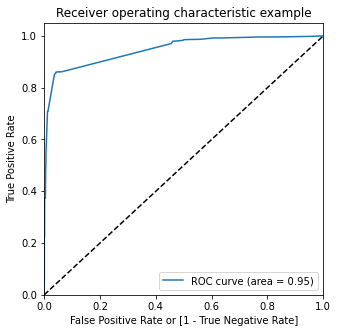

In [227]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

### Finding Optimal Cutoff Point
Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [228]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.181824,3009,0,1,1,0,0,0,0,0,0,0,0
1,0,0.112478,1012,0,1,1,0,0,0,0,0,0,0,0
2,0,0.000791,9226,0,1,0,0,0,0,0,0,0,0,0
3,1,0.768043,4750,1,1,1,1,1,1,1,1,1,0,0
4,1,0.977082,7987,1,1,1,1,1,1,1,1,1,1,1


In [229]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.689183  0.982829  0.505250
0.2   0.2  0.908203  0.861406  0.937516
0.3   0.3  0.919855  0.860589  0.956978
0.4   0.4  0.919383  0.858953  0.957234
0.5   0.5  0.919540  0.855683  0.959539
0.6   0.6  0.919855  0.854456  0.960819
0.7   0.7  0.920170  0.851594  0.963124
0.8   0.8  0.879861  0.709730  0.986428
0.9   0.9  0.819399  0.540883  0.993854


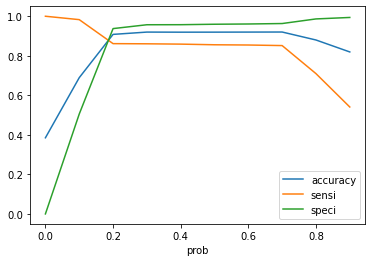

In [230]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [231]:
# From the curve above, 0.25 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.25 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.181824,3009,0,1,1,0,0,0,0,0,0,0,0,0
1,0,0.112478,1012,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.000791,9226,0,1,0,0,0,0,0,0,0,0,0,0
3,1,0.768043,4750,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.977082,7987,1,1,1,1,1,1,1,1,1,1,1,1


### Precision and Recall

In [232]:
#Looking at the confusion matrix again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.predicted )
confusion


array([[3747,  158],
       [ 353, 2093]])

#### Precision


In [233]:

TP / TP + FP

confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.929808973789427

#### Recall

In [234]:

TP / TP + FN

confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8556827473426002

#### Using sklearn models for precision and recall calculations

In [235]:
from sklearn.metrics import precision_score, recall_score

In [236]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.predicted)

0.929808973789427

In [237]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.predicted)

0.8556827473426002

## Precision and Recall Tradeoff

In [238]:
from sklearn.metrics import precision_recall_curve

In [239]:
y_train_pred_final.Converted, y_train_pred_final.predicted

(0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: Converted, Length: 6351, dtype: int64,
 0       0
 1       0
 2       0
 3       1
 4       1
        ..
 6346    0
 6347    1
 6348    0
 6349    0
 6350    0
 Name: predicted, Length: 6351, dtype: int64)

In [240]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

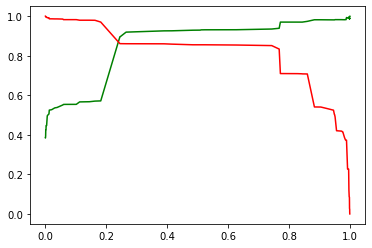

In [241]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

## Making predictions on the test set

In [242]:
X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Facebook,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Others,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Other activities,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,Specialization_Healthcare Management,Specialization_Hospitality Management,Specialization_Human Resource Management,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Other_Specialization,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Tags_Busy,Tags_Closed by Horizzon,Tags_Interested in full time MBA,Tags_Interested in other courses,Tags_Lost to EINS,Tags_Not doing further education,Tags_Others,Tags_Ringing,Tags_Will revert after reading the email,Tags_invalid number,Tags_switched off,Tags_wrong number given,Lead Quality_Low in Relevance,Lead Quality_Might be,Lead Quality_Not Sure,Lead Quality_Worst,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
3009,-0.284595,-0.160255,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
1012,-0.284595,-0.540048,-0.179666,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9226,-0.671384,-0.888650,-1.132538,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4750,-0.284595,1.643304,-0.179666,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
7987,0.295588,2.017593,0.058552,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [244]:
X_test = X_test[col2]
X_test.head()

,Lead Origin_Lead Add Form,Lead Source_Welingak Website,Last Activity_Email Bounced,What is your current occupation_Unemployed,Tags_Busy,Tags_Closed by Horizzon,Tags_Lost to EINS,Tags_Ringing,Tags_Will revert after reading the email,Tags_switched off,Lead Quality_Not Sure,Lead Quality_Worst,Last Notable Activity_SMS Sent
3271,0,0,0,1,0,0,0,0,1,0,1,0,0
1490,0,0,0,0,0,0,0,0,1,0,0,0,0
7936,0,0,0,1,0,0,0,0,1,0,1,0,0
4216,1,0,0,0,0,1,0,0,0,0,0,0,0
3830,0,0,0,1,0,0,0,0,1,0,1,0,0


In [245]:
X_test_sm = sm.add_constant(X_test)

In [246]:
y_test_pred = res.predict(X_test_sm)

In [247]:
y_test_pred[:10]

3271    0.181824
1490    0.951722
7936    0.181824
4216    0.999690
3830    0.181824
1800    0.951722
6507    0.011653
4821    0.000409
4223    0.996224
4714    0.181824
dtype: float64

In [249]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [250]:
# Let's see the head
y_pred_1.head()

,0
3271,0.181824
1490,0.951722
7936,0.181824
4216,0.999690
3830,0.181824


In [251]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [252]:
# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [253]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [254]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [255]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,3271,0.181824
1,1,1490,0.951722
2,0,7936,0.181824
3,1,4216,0.999690
4,0,3830,0.181824


In [260]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [261]:
# Rearranging the columns
columns_titles = ['Prospect ID','Converted','Converted_prob']
y_pred_final=y_pred_final.reindex(columns=columns_titles)

In [262]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Converted_prob
0,3271,0,NaN
1,1490,1,NaN
2,7936,0,NaN
3,4216,1,NaN
4,3830,0,NaN


In [264]:
y_pred_final['final_predicted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.25 else 0)

In [265]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,final_predicted
0,3271,0,NaN,0
1,1490,1,NaN,0
2,7936,0,NaN,0
3,4216,1,NaN,0
4,3830,0,NaN,0


In [267]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.6367976496511201

In [268]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1734,    0],
       [ 989,    0]])

In [ ]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [269]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8556827473426002

In [270]:
# Let us calculate specificity
TN / float(TN+FP)

0.9595390524967989

In [ ]:
Observations:
After running the model on the Train Dataset these are the figures we obtain:
Accuracy : 91.98%
Sensitivity : 85.5%
Specificity : 95.95%
After running the model on the Test Dataset these are the figures we obtain:
Accuracy : 63.67%
Sensitivity : 85.5%
Specificity : 95.95%